<a href="https://colab.research.google.com/github/maielhadad99/Knn_Nb_Project/blob/main/Knn_and_NB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', color_codes=True)

In [ ]:
#Load the dataset into the notebook
dataset = pd.read_csv('/content/ortho_knnnb.csv')


In [ ]:
dataset

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [ ]:
#checking the top five lines of the dataset
dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


this data is about the types of bones and measurments and we are looking at all these measurments and predicting if it is normal or abnormal

In [ ]:
dataset.shape

(310, 7)

In [ ]:
dataset.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
# Data Cleaning
dataset.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [ ]:
# Correlation 
corr_dataset=dataset.corr()
corr_dataset

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


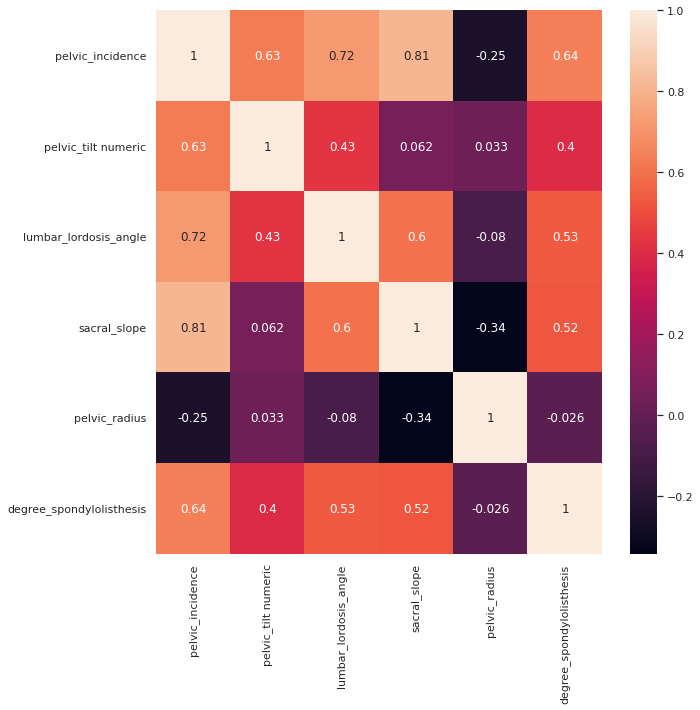

In [ ]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_dataset,annot=True)

In [ ]:
#checking for string values
dataset.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [ ]:
# Converting the range values
dataset['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
#label encoding
df=dataset['class'].replace({'Abnormal':0,'Normal':1})

In [ ]:
X=dataset.drop(['class'],axis=1)
Y=df.values

In [ ]:
#spliting the train and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
# Training with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_accuracy=[]
for k in range(1,16):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_pred=knn.predict(X_train)
  train_score=accuracy_score(train_pred,Y_train)
  test_pred= knn.predict(X_test)
  test_score=(round(accuracy_score(test_pred,Y_test)*100,2))
  test_accuracy.append(test_score)
  print("Test Accuracy: ",test_score,"Value of K: ",k)

Test Accuracy:  83.87 Value of K:  1
Test Accuracy:  82.8 Value of K:  2
Test Accuracy:  86.02 Value of K:  3
Test Accuracy:  83.87 Value of K:  4
Test Accuracy:  84.95 Value of K:  5
Test Accuracy:  83.87 Value of K:  6
Test Accuracy:  84.95 Value of K:  7
Test Accuracy:  86.02 Value of K:  8
Test Accuracy:  84.95 Value of K:  9
Test Accuracy:  83.87 Value of K:  10
Test Accuracy:  80.65 Value of K:  11
Test Accuracy:  84.95 Value of K:  12
Test Accuracy:  87.1 Value of K:  13
Test Accuracy:  87.1 Value of K:  14
Test Accuracy:  84.95 Value of K:  15


In [ ]:
#verifying the best accuracy of the K value
print('Good accuracy is',max(test_accuracy),'\n were K value is',k)

Good accuracy is 87.1 
 were K value is 15


In [ ]:
# Training with naive bayes
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,Y_train)
Y_pred=nvclassifier.predict(X_test)

In [ ]:
#accuracy of Naive bayes
from sklearn.metrics import accuracy_score
print("The Accuracy of the NB is",round(accuracy_score(Y_pred,Y_test)*100,2))

The Accuracy of the NB is 81.72


In [ ]:
#confusion matrix
confusion_matrix(Y_test,Y_pred)

array([[52, 14],
       [ 3, 24]])